# Лабораторна робота №5
### Студента групи МІТ-31
### Переверзева Олексія

In [146]:
import pandas as pd

data = pd.read_csv('insurance.csv')

data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [147]:
# Перетворення усіх категорій на числа

data_one_hot = pd.get_dummies(data, dtype=int)
data.to_csv('insurance_gd.csv', index=False)

data_one_hot

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [148]:
X = data_one_hot.drop("charges", axis=1)
y = data_one_hot["charges"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

X_test

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
200,19,32.11,0,1,0,1,0,0,1,0,0
350,57,23.18,0,1,0,1,0,0,1,0,0
226,28,38.06,0,0,1,1,0,0,0,1,0
709,36,27.74,0,1,0,1,0,1,0,0,0
293,22,28.82,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
287,63,26.22,0,1,0,1,0,0,1,0,0
433,60,30.50,0,1,0,1,0,0,0,0,1
66,61,39.10,2,1,0,1,0,0,0,0,1
1185,45,23.56,2,0,1,1,0,1,0,0,0


In [149]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model_nn_3l = Sequential([
    Dense(units=64, activation='relu', input_shape=(X.shape[1],)),
    Dense(units=32, activation='relu'),
    Dense(units=1)
])

# Скомпілюємо та навчимо модель
model_nn_3l.compile(optimizer='adam', loss='mae', metrics=['mae'])
results_3l = model_nn_3l.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100


34/34 [==============================] - 1s 5ms/step - loss: 13469.7197 - mae: 13469.7197 - val_loss: 12427.5996 - val_mae: 12427.5996
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13438.0449 - mae: 13438.0449 - val_loss: 12381.7188 - val_mae: 12381.7188
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 13361.9697 - mae: 13361.9697 - val_loss: 12265.8369 - val_mae: 12265.8369
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 13187.8154 - mae: 13187.8154 - val_loss: 12022.9189 - val_mae: 12022.9189
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 12848.7061 - mae: 12848.7061 - val_loss: 11578.6738 - val_mae: 11578.6738
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 12274.1494 - mae: 12274.1494 - val_loss: 10872.7061 - val_mae: 10872.7061
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 11422.5859 - mae: 11422.5859 - val_loss: 9899.3164 - val_

In [150]:
# Оцінка моделі на основі тестових даних

print("Модель 3L Тестові втрати (MAE) у тестових даних:", model_nn_3l.evaluate(X_test, y_test, verbose=0))

Модель 3L Тестові втрати (MAE) у тестових даних: [5451.6728515625, 5451.6728515625]


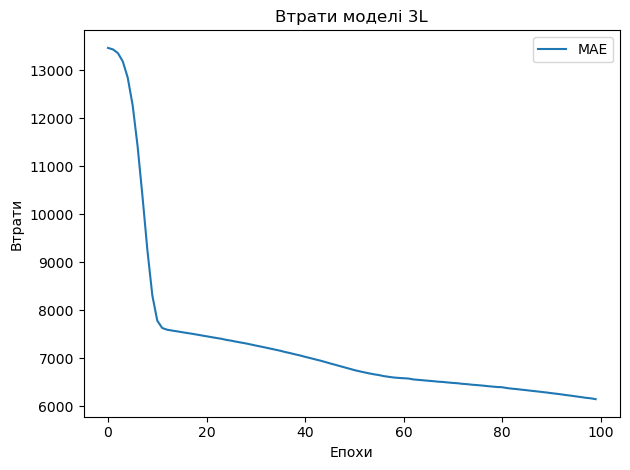

In [151]:
# Візуалізація результатів навчання
import matplotlib.pyplot as plt

plt.plot(results_3l.history['mae'], label='MAE')
plt.xlabel('Епохи')
plt.ylabel('Втрати')
plt.title('Втрати моделі 3L')
plt.legend()
plt.tight_layout()
plt.show()

Поки що результати є досить низькими, тому вдосконалимо нашу модель, щоб знизити показник MAE

*Збільшимо кількість шарів до 4, відповідно збільшивши кількість нейронів*

In [152]:
data = pd.read_csv('insurance_gd.csv')

X = data_one_hot.drop("charges", axis=1)
y = data_one_hot["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

model_nn_4l = Sequential([
    Dense(units=128, activation='relu', input_shape=(X.shape[1],)),
    Dense(units=64, activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=1)
])

model_nn_4l.compile(optimizer='adam', loss='mae', metrics=['mae'])
results_4l = model_nn_4l.fit(X_train, y_train, epochs=100, verbose=0)

In [153]:
print("Модель 4L Тестові втрати (MAE) у тестових даних:", model_nn_4l.evaluate(X_test, y_test, verbose=0))

Модель 4L Тестові втрати (MAE) у тестових даних: [2253.4921875, 2253.4921875]


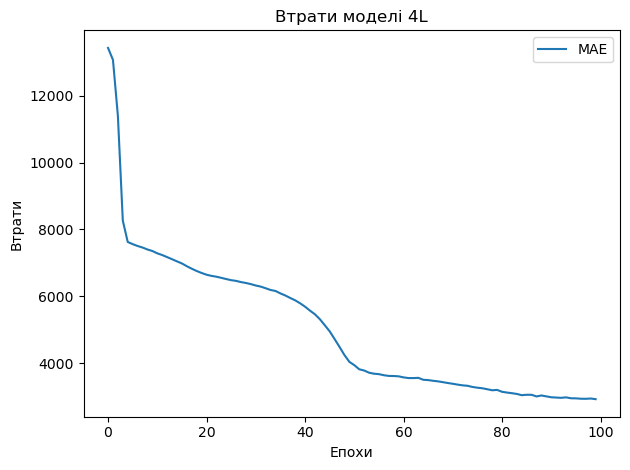

In [154]:
plt.plot(results_4l.history['mae'], label='MAE')
plt.xlabel('Епохи')
plt.ylabel('Втрати')
plt.title('Втрати моделі 4L')
plt.legend()
plt.tight_layout()
plt.show()

Бачимо що значення MAE знизилося більше, ніж у два рази, відповідно збільшення кількості шарів впливає на покращення моделі

*Додамо ще один шар та збільшимо к-ть епох*

In [155]:
data = pd.read_csv('insurance_gd.csv')

X = data_one_hot.drop("charges", axis=1)
y = data_one_hot["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

model_nn_5l = Sequential([
    Dense(units=256, activation='relu', input_shape=(X.shape[1],)),
    Dense(units=128, activation='relu'),
    Dense(units=64, activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=1)
])

model_nn_5l.compile(optimizer='adam', loss='mae', metrics=['mae'])
results_5l = model_nn_5l.fit(X_train, y_train, epochs=300, verbose=0)

In [156]:
print("Модель 5L Тестові втрати (MAE) у тестових даних:", model_nn_5l.evaluate(X_test, y_test, verbose=0))

Модель 5L Тестові втрати (MAE) у тестових даних: [1469.2235107421875, 1469.2235107421875]


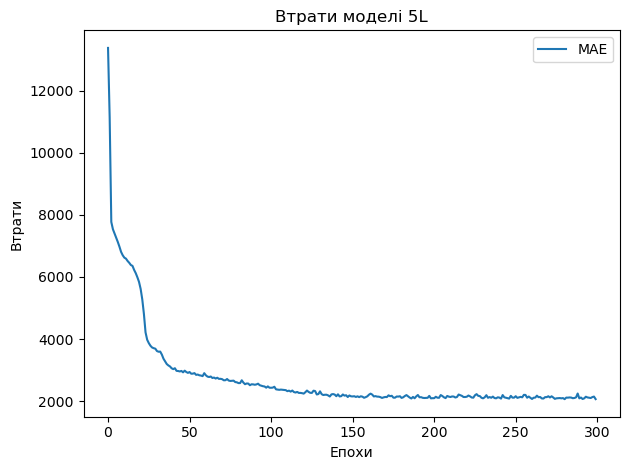

In [157]:
plt.plot(results_5l.history['mae'], label='MAE')
plt.xlabel('Епохи')
plt.ylabel('Втрати')
plt.title('Втрати моделі 5L')
plt.legend()
plt.tight_layout()
plt.show()

Результати ще покращилися, відповідно збільшення кількості епох може позитивно впливати на покращення моделі

*Спробуємо виконати попередню обробку даних, включаючи нормалізацію та стандартизацію. Це буде досягнуто шляхом масштабування всіх значень з початкового діапазону до інтервалу між 0 і 1. Ми також перетворимо категоріальні ознаки у числові, застосовуючи make_column_transformer з бібліотеки Scikit-Learn, та проведемо їх нормалізацію.*

In [158]:
data = pd.read_csv('insurance.csv')

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
# Створимо трансформатор стовпців, це допоможе нам нормалізувати, попередньо обробити наші дані
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # Цей оцінювач масштабує та перекладає кожну функцію окремо так, щоб вона була в заданому діапазоні на навчальному наборі, наприклад. між нулем і одиницею.
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"]) # Закодовує категоріальні ознаки як одноразовий числовий масив.
)

X = data.drop("charges", axis=1)
y = data["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

X_test

,age,sex,bmi,children,smoker,region
200,19,female,32.11,0,no,northwest
350,57,female,23.18,0,no,northwest
226,28,male,38.06,0,no,southeast
709,36,female,27.74,0,no,northeast
293,22,female,28.82,0,no,southeast
...,...,...,...,...,...,...
287,63,female,26.22,0,no,northwest
433,60,female,30.50,0,no,southwest
66,61,female,39.10,2,no,southwest
1185,45,male,23.56,2,no,northeast


In [159]:
ct.fit(X_train)
# Перетворимо навчальні та тестові дані 
X_train_tr = ct.transform(X_train)
X_test_tr = ct.transform(X_test)

print(X_test_tr)

[[0.02173913 0.43449018 0.         ... 1.         0.         0.        ]
 [0.84782609 0.19424267 0.         ... 1.         0.         0.        ]
 [0.2173913  0.59456551 0.         ... 0.         1.         0.        ]
 ...
 [0.93478261 0.62254506 0.4        ... 0.         0.         1.        ]
 [0.58695652 0.20446597 0.4        ... 0.         0.         0.        ]
 [0.08695652 0.38848534 0.         ... 0.         0.         0.        ]]


In [160]:
model_nn_tr = Sequential([
    Dense(units=256, activation='relu', input_shape=(X_train_tr.shape[1],)),
    Dense(units=128, activation='relu'),
    Dense(units=64, activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=1)
])

from tensorflow.keras.losses import mae
from tensorflow.keras.optimizers import Adam

model_nn_tr.compile(loss=mae, optimizer=Adam(), metrics=['mae'])
results_tr = model_nn_tr.fit(X_train_tr, y_train, epochs=300, verbose=0) 

In [161]:
print("Модель з нормалізованими даними Тестові втрати (MAE) у тестових даних:", model_nn_tr.evaluate(X_test_tr, y_test))

9/9 [==============================] - 0s 1ms/step - loss: 1039.7999 - mae: 1039.7999
Модель з нормалізованими даними Тестові втрати (MAE) у тестових даних: [1039.7999267578125, 1039.7999267578125]


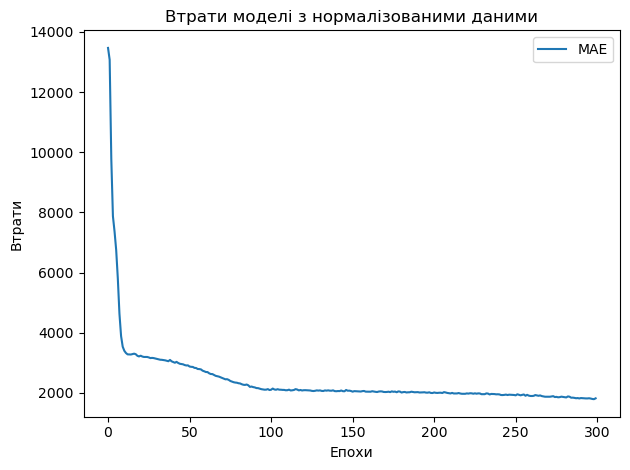

In [162]:
plt.plot(results_tr.history['mae'], label='MAE')
plt.xlabel('Епохи')
plt.ylabel('Втрати')
plt.title('Втрати моделі з нормалізованими даними')
plt.legend()
plt.tight_layout()
plt.show()

Результати знову покращилися, однозначно нормалізація і підготовка даних сприяє більш ефективній роботі моделі та кращим результатам

Порівняння втрат різних моделей

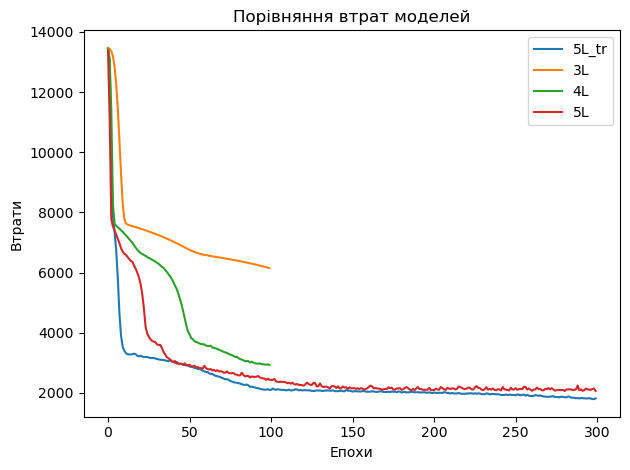

In [163]:
plt.plot(results_tr.history['mae'], label='5L_tr')
plt.plot(results_3l.history['mae'], label='3L')
plt.plot(results_4l.history['mae'], label='4L')
plt.plot(results_5l.history['mae'], label='5L')
plt.xlabel('Епохи')
plt.ylabel('Втрати')
plt.title('Порівняння втрат моделей')
plt.legend()
plt.tight_layout()
plt.show()